# Part 1

In [40]:
!pip install --upgrade --no-cache-dir gdown
!gdown 14ko2e1olsQdldRdFtD9A26r6W3mVl7wP

Downloading...
From: https://drive.google.com/uc?id=14ko2e1olsQdldRdFtD9A26r6W3mVl7wP
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 138MB/s]


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('/content/heart_disease_health_indicators.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


# Part 2

In [43]:
from sklearn.utils import shuffle

# Separate the data into two classes
class_0_data = df[df['HeartDiseaseorAttack'] == 0]
class_1_data = df[df['HeartDiseaseorAttack'] == 1]

# choosing 100 random datas
nclass_0_data = class_0_data.sample(n=100, random_state=93)
nclass_1_data = class_1_data.sample(n=100, random_state=93)

# Combine datas
new_df = pd.concat([nclass_0_data, nclass_1_data], ignore_index=True)
df = shuffle(new_df, random_state=93)
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
89,0,0,0,1,24,0,0,0,1,1,...,1,0,3,0,30,0,0,5,6,7
50,0,0,0,1,26,0,0,0,1,1,...,1,0,2,2,0,0,0,2,6,7
68,0,1,1,1,32,0,0,0,1,0,...,1,0,2,0,0,0,1,9,6,8
28,0,0,1,1,28,0,0,0,1,1,...,1,0,2,0,0,0,1,9,5,6
65,0,0,1,0,27,1,0,0,0,1,...,1,0,3,1,0,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,1,0,1,38,0,0,0,0,0,...,1,0,5,0,3,1,1,7,2,2
152,1,1,1,1,45,0,0,0,1,0,...,1,0,3,5,2,0,1,8,6,8
132,1,1,0,1,49,0,0,0,1,1,...,1,0,4,4,30,1,0,8,4,6
91,0,1,0,1,32,1,0,0,1,1,...,1,0,2,0,0,0,0,8,6,8


# Part 3

In [44]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
X.shape, y.shape

((200, 21), (200,))

## Classification

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron

In [104]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93, stratify=y)

# Display the dimensions of the training and testing sets
print(f'Dimensions of the training features: {X_train.shape}')
print(f'Dimensions of the training target: {y_train.shape}')
print(f'Dimensions of the testing features: {X_test.shape}')
print(f'Dimensions of the testing target: {y_test.shape}')

Dimensions of the training features: (160, 21)
Dimensions of the training target: (160,)
Dimensions of the testing features: (40, 21)
Dimensions of the testing target: (40,)


### Logistic Regression

In [116]:
LogReg_classifier = LogisticRegression(C=1.0, penalty='l2', solver='newton-cholesky', max_iter=150, random_state=93)
LogReg_classifier.fit(X_train, y_train)
y_pred = LogReg_classifier.predict(X_test)
LogReg_train_accuracy = LogReg_classifier.score(X_train, y_train)
LogReg_test_accuracy = LogReg_classifier.score(X_test, y_test)

In [ ]:
y_pred, y_test

(array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1]),
 array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1,

### SGD Classifier

In [186]:
SGD_classifier = SGDClassifier(alpha=0.0001, loss='log_loss', max_iter=150, penalty='l2', random_state=93)
SGD_classifier.fit(X_train, y_train)
y_pred1 = SGD_classifier.predict(X_test)
SGD_train_accuracy = SGD_classifier.score(X_train, y_train)
SGD_test_accuracy = SGD_classifier.score(X_test, y_test)

In [137]:
y_pred1, y_test

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]),
 114    1
 190    1
 29     0
 153    1
 39     0
 110    1
 133    1
 78     0
 52     0
 87     0
 106    1
 44     0
 92     0
 81     0
 169    1
 88     0
 33     0
 187    1
 101    1
 173    1
 131    1
 94     0
 71     0
 15     0
 1      0
 125    1
 184    1
 157    1
 174    1
 141    1
 97     0
 64     0
 105    1
 62     0
 65     0
 37     0
 189    1
 27     0
 183    1
 193    1
 Name: HeartDiseaseorAttack, dtype: int64)

### Perceptron

In [138]:
perceptron_classifier = Perceptron(alpha=0.0001, penalty='l2', max_iter=200, random_state=93)
perceptron_classifier.fit(X_train, y_train)
y_pred2 = perceptron_classifier.predict(X_test)
perceptron_train_accuracy = perceptron_classifier.score(X_train, y_train)
perceptron_test_accuracy = perceptron_classifier.score(X_test, y_test)

In [139]:
y_pred2, y_test

(array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]),
 114    1
 190    1
 29     0
 153    1
 39     0
 110    1
 133    1
 78     0
 52     0
 87     0
 106    1
 44     0
 92     0
 81     0
 169    1
 88     0
 33     0
 187    1
 101    1
 173    1
 131    1
 94     0
 71     0
 15     0
 1      0
 125    1
 184    1
 157    1
 174    1
 141    1
 97     0
 64     0
 105    1
 62     0
 65     0
 37     0
 189    1
 27     0
 183    1
 193    1
 Name: HeartDiseaseorAttack, dtype: int64)

### Accuracies

In [140]:
print(f"Logistic Regression Train Accuracy: {LogReg_train_accuracy:.2f}")
print(f"Logistic Regression Test Accuracy: {LogReg_test_accuracy:.2f}")

print(f"SGD Classifier Train Accuracy: {SGD_train_accuracy:.2f}")
print(f"SGD Classifier Test Accuracy: {SGD_test_accuracy:.2f}")

print(f"Perceptron Train Accuracy: {perceptron_train_accuracy:.2f}")
print(f"Perceptron Test Accuracy: {perceptron_test_accuracy:.2f}")

Logistic Regression Train Accuracy: 0.84
Logistic Regression Test Accuracy: 0.75
SGD Classifier Train Accuracy: 0.78
SGD Classifier Test Accuracy: 0.75
Perceptron Train Accuracy: 0.71
Perceptron Test Accuracy: 0.78


# Part 4

## SGD Classifier

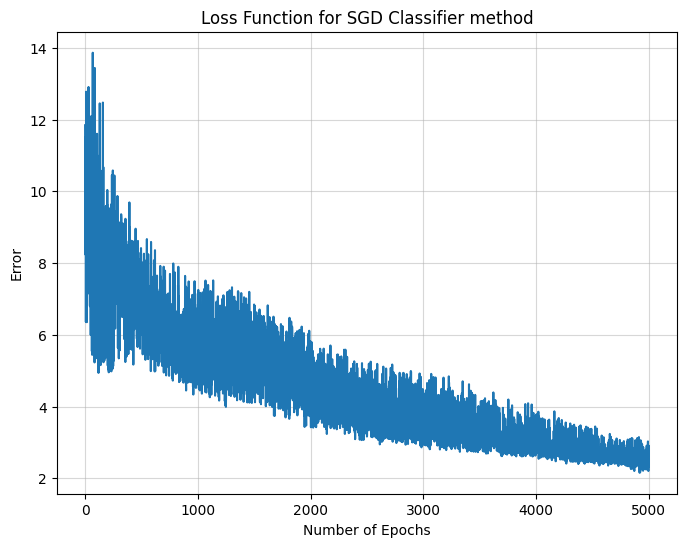

In [187]:
from sklearn.metrics import log_loss
error_hist = []
epochs = 5000

for _ in range(epochs):

    SGD_classifier.partial_fit(X_train, y_train, [0, 1])
    loss = log_loss(y_train , SGD_classifier.predict_proba(X_train))
    error_hist.append(loss)

plt.figure(figsize=(8, 6))
plt.plot(error_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function for SGD Classifier method')
plt.grid(alpha=0.5)

# Part 5

## Logistic Regression

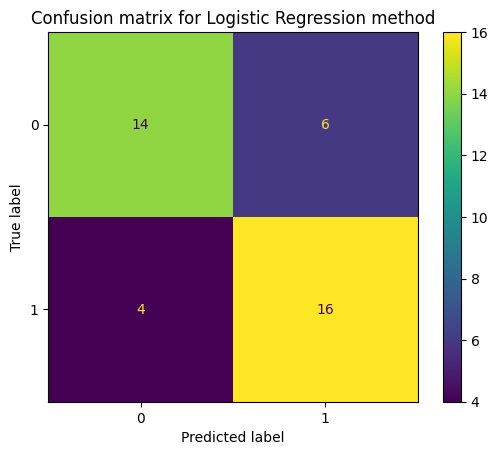

In [156]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion matrix for Logistic Regression method')
plt.show()

In [158]:
precision = precision_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Precision of Logistic Regression method:", precision)
print("Specificity of Logistic Regression method:", specificity)

Precision of Logistic Regression method: 0.7272727272727273
Specificity of Logistic Regression method: 0.7


## SGD Classifier

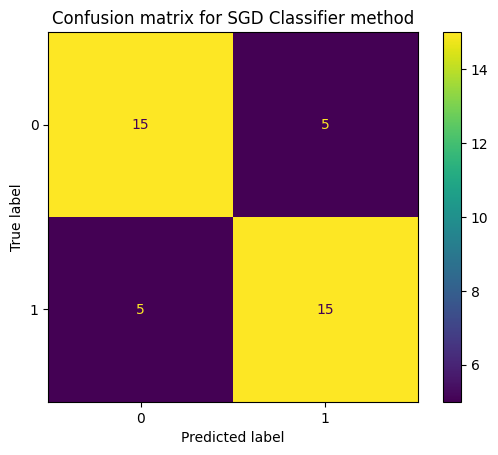

In [164]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
disp1.plot()
plt.title('Confusion matrix for SGD Classifier method')
plt.show()

In [168]:
precision1 = precision_score(y_test, y_pred1)
specificity1 = conf_matrix1[0, 0] / (conf_matrix1[0, 0] + conf_matrix1[0, 1])

print("Precision of SGD Classifier method:", precision1)
print("Specificity of SGD Classifier method:", specificity1)

Precision of SGD Classifier method: 0.75
Specificity of SGD Classifier method: 0.75


## Perceptron

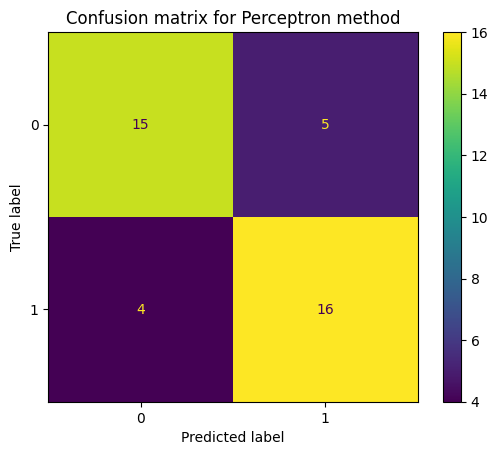

In [169]:
conf_matrix2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
disp2.plot()
plt.title('Confusion matrix for Perceptron method')
plt.show()

In [170]:
precision2 = precision_score(y_test, y_pred2)
specificity2 = conf_matrix2[0, 0] / (conf_matrix2[0, 0] + conf_matrix2[0, 1])

print("Precision of Perceptron method:", precision2)
print("Specificity of Perceptron method:", specificity2)

Precision of Perceptron method: 0.7619047619047619
Specificity of Perceptron method: 0.75
